In [165]:
import tensorflow as tf
from tensorflow import keras 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import cv2


In [72]:
datadir= "Train"
categories=["meningioma_tumor","no_tumor","glioma_tumor","pituitary_tumor"]

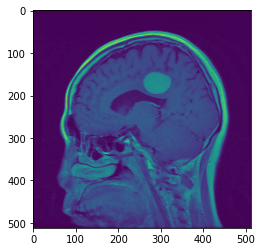

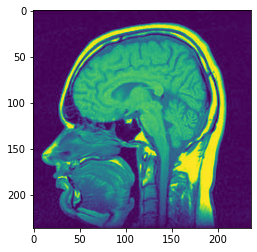

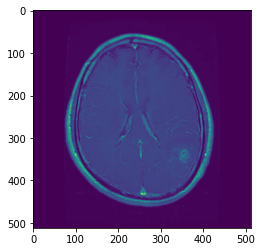

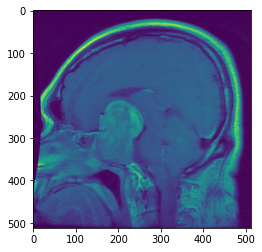

In [73]:
for category in categories: 
    path=os.path.join(datadir,category)
    for img in os.listdir(path) :
        img_array =cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break


In [146]:
print(img_array.shape)

(512, 512)


In [75]:


training_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(datadir,category)  
        class_num = categories.index(category) 

        for img in (os.listdir(path)):  
            
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                 
                training_data.append([img_array, class_num]) 
              


In [76]:
create_training_data()

In [158]:
testing_data=[]
path_test=os.path.join('Test','Test')
for img in (os.listdir(path_test)):  
            
                img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  
                 
                testing_data.append(img_array) 
              

In [161]:
test=[]
shape=testing_data[0].shape
for i in range(446):
    if testing_data[i].shape==shape:
     test.append(testing_data[i])

In [159]:
len(testing_data)

446

In [77]:
for sample in training_data [:10]:
   print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [78]:
x=[]
y=[]

In [79]:
for id,label in training_data :
    x.append(id)
    y.append(label)



In [80]:
x=np.array(x)
y=np.array(y)

C:\Users\samim\AppData\Local\Temp;\ipykernel_18420\3079132073.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x=np.array(x)


In [117]:
x_train=[]
y_train=[]

shape=x[0].shape


for i in range(2714):
    if x[i].shape==shape:
     x_train.append(x[i])
     y_train.append(y[i])

        

In [129]:
x[0].shape

TensorShape([512, 512])

In [118]:
x=tf.convert_to_tensor(x_train)
y=tf.convert_to_tensor(y_train)

In [143]:



model=tf.keras.Sequential([
    # The First convolution
    tf.keras.layers.Conv2D(64,(5,5),input_shape=(512,512,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])


In [145]:
# the model may take a lot of time to fit the data due to high number of pixels 
# if you want to try a bigger number epochs try it on google collab 
model.fit(x,y,epochs=3)

Epoch 1/3
63/63 [==============================] - 684s 11s/step - loss: 0.4050 - accuracy: 0.8462
Epoch 2/3
63/63 [==============================] - 678s 11s/step - loss: 0.2868 - accuracy: 0.8947
Epoch 3/3
63/63 [==============================] - 669s 11s/step - loss: 0.1797 - accuracy: 0.9266


In [163]:
y_pred=model.predict(np.array(test))